In [1]:
import double_slit as ds
import numpy as np
import matplotlib.pyplot as plt

### Example for intensity distribution plot ###

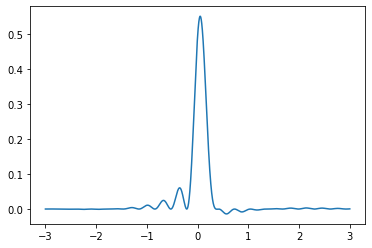

In [2]:
x = np.linspace(-3, 3, num=100*600+1)

y = ds.double_slit(x, intensity=1, sx=10, x0=0.1, offset=0, a2=-2, a3=-2, phase=-1.5 * np.pi)
plt.plot(x, y)

### Example for derivation plot ###

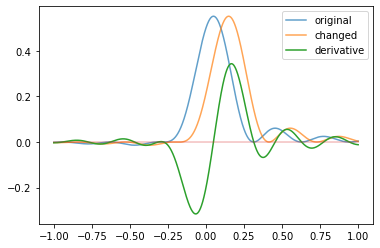

In [3]:
x = np.linspace(-1, 1, num=100*600+1)
y_derivs = ds.calc_derivatives(x, intensity=1, sx=10, x0=0, offset=0, a2=2, a3=2, phase=1.5 * np.pi)
y     =    ds.double_slit(x, intensity=1, sx=10, x0=0, offset=0, a2=2, a3=2, phase=1.5 * np.pi)
y2    =    ds.double_slit(x, intensity=1, sx=10, x0=0+0.1, offset=0, a2=2, a3=2, phase=1.5 * np.pi)
plt.plot(x, y ,alpha=0.7,label="original")   
plt.plot(x, y2,alpha=0.7,label="changed")    #slightly changed parameter, to see if derivation is correct

plt.plot(x, 0.1*y_derivs[0],label="derivative")
plt.plot(x,np.zeros_like(x),alpha=0.3) #x-axis
plt.legend()

### Example for curve fit ###

In [4]:
from double_slit import ds_para      #dataclass to save the double_slit parameters

In [5]:
para=ds_para(3,4,0,0,2,2,1.5 * np.pi)
para

ds_para(intensity=3, sx=4, x0=0, offset=0, a2=2, a3=2, phase=4.71238898038469)

In [6]:
para.to_array()

array([3.        , 4.        , 0.        , 0.        , 2.        ,
       2.        , 4.71238898])

In [7]:
np.random.seed(seed=42)

x=np.random.normal(loc=0.0,scale=1.0,size=(100,))   #generate random x-values
true_input=ds_para(3,4,0,0,2,2,1.5 * np.pi)         #pick random true values

y=ds.double_slit(x, intensity=true_input.intensity, sx=true_input.sx, x0=true_input.x0,
                 offset=true_input.offset, a2=true_input.a2, a3=true_input.a3, phase=true_input.phase)
            #create the corresponding y-values

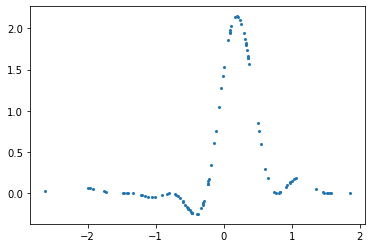

In [8]:
plt.scatter(x,y,s=4)

In [9]:
Regressor = ds.double_slit_reg(x0_pred=ds_para(2.6,3.7,0.2,0.2,2.0,2.2,1.5 * np.pi))

In [10]:
Regressor.fit(x,y)

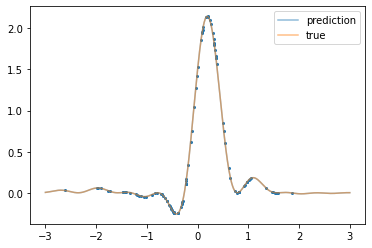

In [11]:
Regressor.plot_result(x,y,true_input=true_input)

In [12]:
Regressor.x           #how to extract the parameters

ds_para(intensity=3.00000000000024, sx=4.000000000000048, x0=-3.8136095409639393e-16, offset=-1.2526139085049245e-15, a2=1.9999999999976223, a3=2.0000000000000195, phase=4.712388980384595)

Remark:

If the initial guess is close to the true value, the prediction is great, otherwise the fit is stuck in a local minima

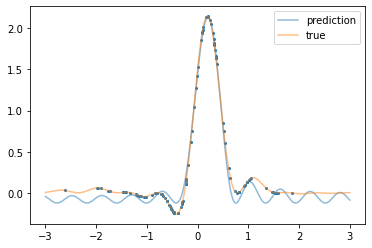

In [13]:
Regressor = ds.double_slit_reg(x0_pred=ds_para(2.6,4.4,0.2,0.2,2.0,2.2,1.5 * np.pi)) 
                                             #slightly changed the 3.7 to a 4.4
Regressor.fit(x,y)
Regressor.plot_result(x,y,true_input=true_input)

In [14]:
Regressor.x 

ds_para(intensity=5392.034391052709, sx=5.345980765641076, x0=0.1673832405657303, offset=-0.1243710656182663, a2=0.9992412528497557, a3=0.04550315017808459, phase=3.153413227004546)

We see that the intensity explodes and the prediction is not great